# Comprehensive Machine Learning Techniques for Breast Cancer Classification

In [3]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.svm import LinearSVC
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve, confusion_matrix
import matplotlib.pyplot as plt
from sklearn.pipeline import Pipeline
from sklearn.pipeline import make_pipeline
from sklearn.base import clone
from sklearn.cluster import KMeans
from sklearn.neighbors import NearestNeighbors
from scipy import stats
from sklearn.cluster import SpectralClustering


## 1.Supervised, Semi-Supervised, and Unsupervised Learning

### (a).

In [4]:
column_names = ["ID", "Diagnosis", "radius1", "texture1", "perimeter1", "area1", 
                "smoothness1", "compactness1", "concavity1", "concave_points1", "symmetry1", "fractal_dimension1",
                "radius2", "texture2", "perimeter2", "area2", 
                "smoothness2", "compactness2", "concavity2", "concave_points2", "symmetry2", "fractal_dimension2",
                "radius3", "texture3", "perimeter3", "area3", 
                "smoothness3", "compactness3", "concavity3", "concave_points3", "symmetry3", "fractal_dimension3"]

df = pd.read_csv('./Homework 8 Data/wdbc.data', header=None, names=column_names)

### (b). Monte-Carlo Simulation

In [5]:
#Repeat the following process for each model
#split train and test set
df.loc[df['Diagnosis'] == 'M', 'Diagnosis'] = 1
df.loc[df['Diagnosis'] == 'B', 'Diagnosis'] = 0

malignant_df = df[df['Diagnosis'] == 1]
benigh_df = df[df['Diagnosis'] == 0]

m_train, m_test = train_test_split(malignant_df, test_size=0.20, random_state=42)
b_train, b_test = train_test_split(benigh_df, test_size=0.20, random_state=42)

train_df = pd.concat([m_train, b_train])
test_df = pd.concat([m_test, b_test])

# Separate features and target variable
X_train = train_df.drop('Diagnosis', axis=1)
y_train = train_df['Diagnosis']
X_test = test_df.drop('Diagnosis', axis=1)
y_test = test_df['Diagnosis']

y_train = y_train.astype(int)
y_test = y_test.astype(int)

# Set number of runs
M = 30

#### i. Supervised Learning: Train an L1 -penalized SVM to classify the data. Use 5 fold cross validation to choose the penalty parameter. Use normalized data. Report the average accuracy, precision, recall, F 1 -score, and AUC, for both training and test sets over M runs. Plot the ROC and report the confusion matrix for training and testing in one of the runs.

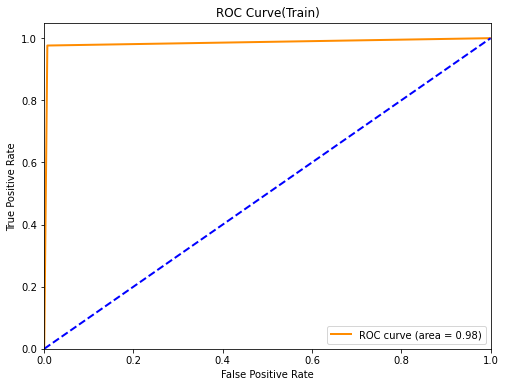

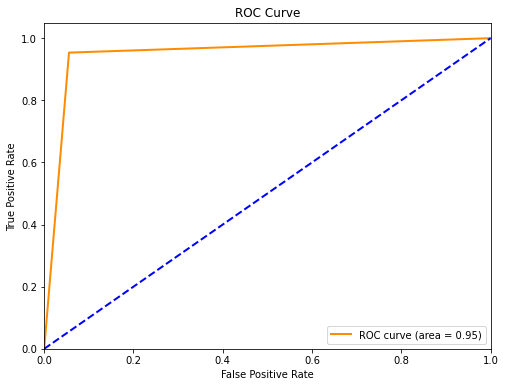

Confusion Matrix for Test Set:
 [[68  4]
 [ 2 41]]
Average Metrics over M runs:
{'train': {'accuracy': 0.9867841409691631, 'precision': 0.9880239520958084, 'recall': 0.9763313609467453, 'f1': 0.9821428571428572, 'auc': 0.9846569085435484}, 'test': {'accuracy': 0.9478260869565216, 'precision': 0.9111111111111112, 'recall': 0.9534883720930233, 'f1': 0.9318181818181822, 'auc': 0.948966408268734}}


In [18]:
# Metrics storage
metrics = {
    'train': {'accuracy': [], 'precision': [], 'recall': [], 'f1': [], 'auc': []},
    'test': {'accuracy': [], 'precision': [], 'recall': [], 'f1': [], 'auc': []}
}

for m in range(M):
    # Create a pipeline with normalization and SVM
    #split train and test set
    df.loc[df['Diagnosis'] == 'M', 'Diagnosis'] = 1
    df.loc[df['Diagnosis'] == 'B', 'Diagnosis'] = 0

    malignant_df = df[df['Diagnosis'] == 1]
    benigh_df = df[df['Diagnosis'] == 0]

    m_train, m_test = train_test_split(malignant_df, test_size=0.20, random_state=42)
    b_train, b_test = train_test_split(benigh_df, test_size=0.20, random_state=42)

    train_df = pd.concat([m_train, b_train])
    test_df = pd.concat([m_test, b_test])

    # Separate features and target variable
    X_train = train_df.drop('Diagnosis', axis=1)
    y_train = train_df['Diagnosis']
    X_test = test_df.drop('Diagnosis', axis=1)
    y_test = test_df['Diagnosis']

    y_train = y_train.astype(int)
    y_test = y_test.astype(int)

    pipeline = make_pipeline(StandardScaler(), LinearSVC(penalty='l1', dual=False, max_iter=50000))

    # Parameters for GridSearchCV
    param_grid = {'linearsvc__C': [0.01, 0.1, 1, 10, 100]}

    # Grid search with 5-fold cross-validation
    grid_search = GridSearchCV(pipeline, param_grid, cv=5)
    grid_search.fit(X_train, y_train)

    # Best model
    best_model = grid_search.best_estimator_

    # Predictions
    y_train_pred = best_model.predict(X_train)
    y_test_pred = best_model.predict(X_test)

    # Store metrics
    for set_name, y_true, y_pred in [('train', y_train, y_train_pred), ('test', y_test, y_test_pred)]:
        metrics[set_name]['accuracy'].append(accuracy_score(y_true, y_pred))
        metrics[set_name]['precision'].append(precision_score(y_true, y_pred, zero_division=0))
        metrics[set_name]['recall'].append(recall_score(y_true, y_pred, zero_division=0))
        metrics[set_name]['f1'].append(f1_score(y_true, y_pred, zero_division=0))
        metrics[set_name]['auc'].append(roc_auc_score(y_true, y_pred))
    if m == 0:
        # Calculate the ROC curve
        fpr, tpr, thresholds = roc_curve(y_train, y_train_pred)

        # Calculate the AUC (Area Under the Curve)
        roc_auc = roc_auc_score(y_train, y_train_pred)

        # Plot the ROC curve
        plt.figure(figsize=(8, 6))
        plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
        plt.plot([0, 1], [0, 1], color='blue', lw=2, linestyle='--')
        plt.xlim([0.0, 1.0])
        plt.ylim([0.0, 1.05])
        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive Rate')
        plt.title('ROC Curve(Train)')
        plt.legend(loc="lower right")
        plt.show()
        
        # Calculate the ROC curve
        fpr, tpr, thresholds = roc_curve(y_test, y_test_pred)

        # Calculate the AUC (Area Under the Curve)
        roc_auc = roc_auc_score(y_test, y_test_pred)

        # Plot the ROC curve
        plt.figure(figsize=(8, 6))
        plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
        plt.plot([0, 1], [0, 1], color='blue', lw=2, linestyle='--')
        plt.xlim([0.0, 1.0])
        plt.ylim([0.0, 1.05])
        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive Rate')
        plt.title('ROC Curve(test)')
        plt.legend(loc="lower right")
        plt.show()

# Average metrics
avg_metrics = {set_name: {metric: np.mean(values) for metric, values in set_metrics.items()} 
               for set_name, set_metrics in metrics.items()}


conf_matrix = confusion_matrix(y_test, y_test_pred)
print("Confusion Matrix for Test Set:\n", conf_matrix)
# Print average metrics
print("Average Metrics over M runs:")
print(avg_metrics)

#### ii. Semi-Supervised Learning/ Self-training: select 50% of the positive class along with 50% of the negative class in the training set as labeled data and the rest as unlabelled data . 

#### A. Train an L1-penalized SVM to classify the labeled data Use normalized data. Choose the penalty parameter using 5 fold cross validation. 

#### B. Find the unlabeled data point that is the farthest to the decision boundary of the SVM. Let the SVM label it (ignore its true label), and add it to the labeled data, and retrain the SVM. Continue this process until all unlabeled data are used. Test the final SVM on the test data and the average accuracy, precision, recall, F1-score, and AUC, for both training and test sets over M runs. Plot the ROC and report the confusion matrix for training and testing in one of the runs.

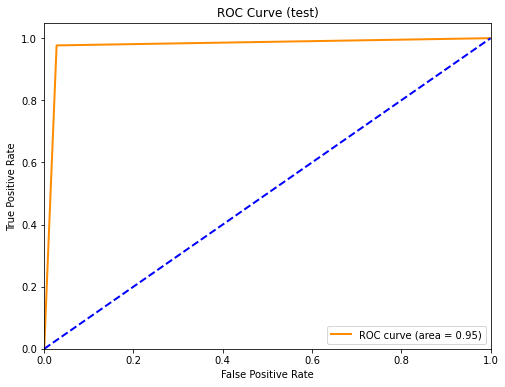

Confusion Matrix for Test Set:
 [[68  4]
 [ 2 41]]


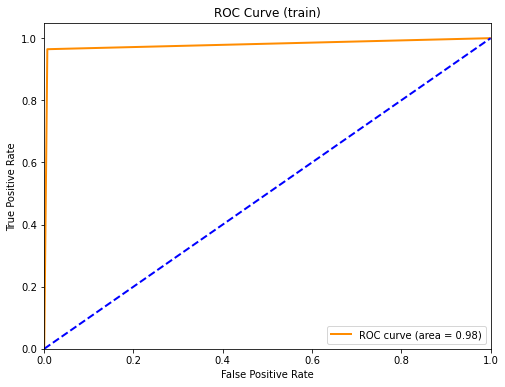

Confusion Matrix for train Set:
 [[283   2]
 [  6 163]]
Average Metrics over M runs:
{'train': {'accuracy': 0.9823788546255509, 'precision': 0.987878787878788, 'recall': 0.964497041420118, 'f1': 0.9760479041916168, 'auc': 0.9787397487802347}, 'test': {'accuracy': 0.9739130434782611, 'precision': 0.9545454545454544, 'recall': 0.9767441860465113, 'f1': 0.9655172413793102, 'auc': 0.9744832041343667}}


In [22]:
M = 30  # Number of runs
metrics = {
    'train': {'accuracy': [], 'precision': [], 'recall': [], 'f1': [], 'auc': []},
    'test': {'accuracy': [], 'precision': [], 'recall': [], 'f1': [], 'auc': []}
}

for run in range(M):
    df = pd.read_csv('./Homework 8 Data/wdbc.data', header=None, names=column_names)
    
    df.loc[df['Diagnosis'] == 'M', 'Diagnosis'] = 1
    df.loc[df['Diagnosis'] == 'B', 'Diagnosis'] = 0

    malignant_df = df[df['Diagnosis'] == 1]
    benigh_df = df[df['Diagnosis'] == 0]

    m_train, m_test = train_test_split(malignant_df, test_size=0.20, random_state=42)
    b_train, b_test = train_test_split(benigh_df, test_size=0.20, random_state=42)

    train_df = pd.concat([m_train, b_train])
    test_df = pd.concat([m_test, b_test])

    X_train = train_df.drop('Diagnosis', axis=1)
    y_train = train_df['Diagnosis']
    X_test = test_df.drop('Diagnosis', axis=1)
    y_test = test_df['Diagnosis']

    y_train = y_train.astype(int)
    y_test = y_test.astype(int)

    # Separate the training data into positive and negative classes
    positive_data = X_train[y_train == 1]
    negative_data = X_train[y_train == 0]

    # Randomly select 50% from each class for labeled data
    positive_labeled = positive_data.sample(frac=0.5, random_state=42)
    negative_labeled = negative_data.sample(frac=0.5, random_state=42)

    # Combine the labeled data
    X_train_labeled = pd.concat([positive_labeled, negative_labeled])
    y_train_labeled = y_train.loc[X_train_labeled.index]

    # The remaining data is the unlabeled data
    X_train_unlabeled = X_train.drop(X_train_labeled.index)
    y_train_unlabeled = y_train.drop(y_train_labeled.index) 
    
    #normalize the data
    scaler = StandardScaler()
    X_train_labeled_normalized = pd.DataFrame(scaler.fit_transform(X_train_labeled))
    X_train_unlabeled_normalized = pd.DataFrame(scaler.transform(X_train_unlabeled))
    
    # Create a pipeline with data normalization and the SVM model
    pipeline = Pipeline([
        ('scaler', StandardScaler()),
        ('svm', LinearSVC(penalty='l1', dual=False, max_iter=30000))
    ])

    # Parameters for GridSearchCV
    param_grid = {'svm__C': [0.01, 0.1, 1, 10, 100]}

    # Set up the grid search with 5-fold cross-validation
    grid_search = GridSearchCV(pipeline, param_grid, cv=5)

    # Train the model
    grid_search.fit(X_train_labeled, y_train_labeled)

    # Get the best parameters and model
    best_params = grid_search.best_params_
    best_svm_model = grid_search.best_estimator_

    
    # Clone the best model to start fresh for each run
    svm_model = clone(best_svm_model)

    # Fit the model on the normalized labeled data
    svm_model.fit(X_train_labeled_normalized, y_train_labeled)

    # Copy the unlabeled data to avoid modifying the original dataset
    X_unlabeled = X_train_unlabeled_normalized.copy()
    y_unlabeled = y_train_unlabeled.copy()

    while len(X_unlabeled) > 0:
        # Predict distances to the decision boundary
        distances = svm_model.decision_function(X_unlabeled)
        farthest_index = np.argmax(np.abs(distances))

        # Add the farthest point to the labeled data
        X_labeled = pd.concat([X_train_labeled_normalized, X_unlabeled.iloc[[farthest_index]]])
        y_labeled = pd.concat([y_train_labeled, pd.Series(svm_model.predict(X_unlabeled.iloc[[farthest_index]]))])

        # Drop the added point from the unlabeled data
        X_unlabeled.drop(X_unlabeled.index[farthest_index], inplace=True)

        # Retrain the SVM with the updated labeled dataset
        svm_model.fit(X_labeled, y_labeled)

    # Evaluation on test data (make sure the test data is also normalized)
    X_test_normalized = scaler.transform(X_test)
    y_pred_test = svm_model.predict(X_test_normalized)
    # Evaluation on train data (make sure the test data is also normalized)
    X_train_normalized = scaler.transform(X_train)
    y_pred_train = svm_model.predict(X_train_normalized)
    
    
    # Store metrics
    for set_name, y_true, y_pred in [('train', y_train, y_pred_train), ('test', y_test, y_pred_test)]:
        metrics[set_name]['accuracy'].append(accuracy_score(y_true, y_pred))
        metrics[set_name]['precision'].append(precision_score(y_true, y_pred, zero_division=0))
        metrics[set_name]['recall'].append(recall_score(y_true, y_pred, zero_division=0))
        metrics[set_name]['f1'].append(f1_score(y_true, y_pred, zero_division=0))
        metrics[set_name]['auc'].append(roc_auc_score(y_true, y_pred))

    if run == 0:  
        fpr, tpr, thresholds = roc_curve(y_test, y_pred_test)
        roc_auc = roc_auc_score(y_test, y_test_pred)
        plt.figure(figsize=(8, 6))
        plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
        plt.plot([0, 1], [0, 1], color='blue', lw=2, linestyle='--')
        plt.xlim([0.0, 1.0])
        plt.ylim([0.0, 1.05])
        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive Rate')
        plt.title('ROC Curve (test)')
        plt.legend(loc="lower right")
        plt.show()
        # Confusion matrix
        conf_matrix = confusion_matrix(y_test, y_test_pred)
        print("Confusion Matrix for Test Set:\n", conf_matrix)
        
        fpr, tpr, thresholds = roc_curve(y_train, y_pred_train)
        roc_auc = roc_auc_score(y_train, y_pred_train)
        plt.figure(figsize=(8, 6))
        plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
        plt.plot([0, 1], [0, 1], color='blue', lw=2, linestyle='--')
        plt.xlim([0.0, 1.0])
        plt.ylim([0.0, 1.05])
        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive Rate')
        plt.title('ROC Curve (train)')
        plt.legend(loc="lower right")
        plt.show()
        # Confusion matrix
        conf_matrix = confusion_matrix(y_train, y_pred_train)
        print("Confusion Matrix for train Set:\n", conf_matrix)

# Calculate and print average metrics over M runs
# Average metrics
avg_metrics = {set_name: {metric: np.mean(values) for metric, values in set_metrics.items()} 
               for set_name, set_metrics in metrics.items()}


print("Average Metrics over M runs:")
print(avg_metrics)


#### iii. Unsupervised Learning: Run k-means algorithm on the whole training set. Ignore the labels of the data, and assume k = 2.

 #### A. Run the k-means algorithm multiple times. 

I used k-means++ initialization method in K-Means clustering enhances the algorithm's ability to avoid local minima by intelligently selecting initial centroids. It starts by randomly choosing the first centroid, then selects subsequent centroids with a probability proportional to the square of their distance from the nearest existing centroid. This method ensures that initial centroids are spread out across the data space, representing different data structures and reducing the likelihood of poor initial placements that could lead to local optima.

#### B. Compute the centers of the two clusters and find the closest 30 data points to each center. Read the true labels of those 30 data points and take a majority poll within them. The majority poll becomes the label predicted by k-means for the members of each cluster. Then compare the labels provided by k-means with the true labels of the training data and report the average accuracy, precision, recall, F1-score, and AUC over M runs, and ROC and the confusion matrix for one of the runs.

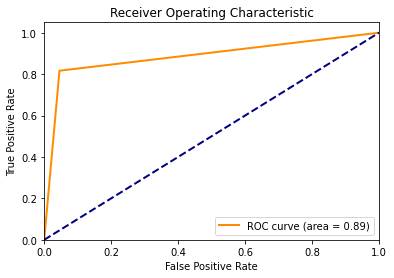

Confusion Matrix for the First Run:
 [[272  13]
 [ 31 138]]
Average Metrics over M runs:
{'accuracy': 0.9030837004405288, 'precision': 0.9139072847682118, 'recall': 0.8165680473372778, 'f1': 0.8625000000000002, 'auc': 0.8854770061247795}


In [5]:
metrics = {'accuracy': [], 'precision': [], 'recall': [], 'f1': [], 'auc': []}
M = 30

for m in range(M):
    df = pd.read_csv('./Homework 8 Data/wdbc.data', header=None, names=column_names)

    df.loc[df['Diagnosis'] == 'M', 'Diagnosis'] = 1
    df.loc[df['Diagnosis'] == 'B', 'Diagnosis'] = 0

    malignant_df = df[df['Diagnosis'] == 1]
    benigh_df = df[df['Diagnosis'] == 0]

    m_train, m_test = train_test_split(malignant_df, test_size=0.20, random_state=42)
    b_train, b_test = train_test_split(benigh_df, test_size=0.20, random_state=42)

    train_df = pd.concat([m_train, b_train])
    test_df = pd.concat([m_test, b_test])

    X_train = train_df.drop('Diagnosis', axis=1)
    y_train = train_df['Diagnosis']
    X_test = test_df.drop('Diagnosis', axis=1)
    y_test = test_df['Diagnosis']

    y_train = y_train.astype(int)
    y_test = y_test.astype(int)

    #normalize the data
    scaler = StandardScaler()
    X_train_scaled = pd.DataFrame(scaler.fit_transform(X_train))
    
    kmeans_model = KMeans(n_clusters=2, n_init=100, random_state=0, init='k-means++')
    kmeans_model.fit(X_train_scaled)

    nbrs = NearestNeighbors(n_neighbors=30, algorithm='ball_tree').fit(X_train_scaled)
    distances, indices = nbrs.kneighbors(kmeans_model.cluster_centers_)
    
    labels = []
    for i in range(2):
        labels.append(stats.mode(y_train.iloc[indices[i]])[0][0])
        
    cluster_labels = np.choose(kmeans_model.labels_, labels)
    
    metrics['accuracy'].append(accuracy_score(y_train, cluster_labels))
    metrics['precision'].append(precision_score(y_train, cluster_labels))
    metrics['recall'].append(recall_score(y_train, cluster_labels))
    metrics['f1'].append(f1_score(y_train, cluster_labels))
    metrics['auc'].append(roc_auc_score(y_train, cluster_labels))
    
    # Plot ROC and Confusion Matrix for the First Run
    if m == 0:
        fpr, tpr, thresholds = roc_curve(y_train, cluster_labels)
        roc_auc = roc_auc_score(y_train, cluster_labels)  # Compute the AUC
    
        conf_matrix = confusion_matrix(y_train, cluster_labels)

        plt.figure()
        plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
        plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
        plt.xlim([0.0, 1.0])
        plt.ylim([0.0, 1.05])
        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive Rate')
        plt.title('Receiver Operating Characteristic')
        plt.legend(loc="lower right")
        plt.show()

        print("Confusion Matrix for the First Run:\n", conf_matrix)
        
# Calculate Average Metrics Over M Runs 
avg_metrics = {metric: np.mean(values) for metric, values in metrics.items()}
print("Average Metrics over M runs:")
print(avg_metrics)


#### iv. Spectral Clustering : Repeat 1(b)iii using spectral clustering , which is clustering based on kernels. Research what spectral clustering is. Use RBF kernel with gamma=1 or find a gamma for which the two clutsres have the same balance as the one in original data set (if the positive class has p and the negative class has n samples, the two clusters must have p and n members). 

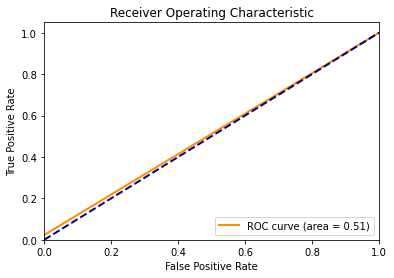

Confusion Matrix for the First Run:
 [[72  0]
 [42  1]]
Average Metrics over M runs:
{'accuracy': 0.6347826086956521, 'precision': 1.0, 'recall': 0.02325581395348838, 'f1': 0.04545454545454544, 'auc': 0.5116279069767444}


In [8]:
from sklearn.metrics import auc

metrics = {'accuracy': [], 'precision': [], 'recall': [], 'f1': [], 'auc': []}
M = 30

for m in range(M):
    df = pd.read_csv('./Homework 8 Data/wdbc.data', header=None, names=column_names)

    df.loc[df['Diagnosis'] == 'M', 'Diagnosis'] = 1
    df.loc[df['Diagnosis'] == 'B', 'Diagnosis'] = 0

    malignant_df = df[df['Diagnosis'] == 1]
    benigh_df = df[df['Diagnosis'] == 0]

    m_train, m_test = train_test_split(malignant_df, test_size=0.20, random_state=42)
    b_train, b_test = train_test_split(benigh_df, test_size=0.20, random_state=42)

    train_df = pd.concat([m_train, b_train])
    test_df = pd.concat([m_test, b_test])

    X_train = train_df.drop('Diagnosis', axis=1)
    y_train = train_df['Diagnosis']
    X_test = test_df.drop('Diagnosis', axis=1)
    y_test = test_df['Diagnosis']

    y_train = y_train.astype(int)
    y_test = y_test.astype(int)

    #normalize the data
    scaler = StandardScaler()
    X_train_scaled = pd.DataFrame(scaler.fit_transform(X_train))
    X_test_scaled = pd.DataFrame(scaler.fit_transform(X_test))
    
    # Configure Spectral Clustering
    spectral_clustering_model = SpectralClustering(n_clusters=2, gamma=1, affinity='rbf', assign_labels='kmeans', random_state=None)

    # Fit the model and predict cluster labels
    cluster_labels = spectral_clustering_model.fit_predict(X_test_scaled)
    
    metrics['accuracy'].append(accuracy_score(y_test, cluster_labels))
    metrics['precision'].append(precision_score(y_test, cluster_labels))
    metrics['recall'].append(recall_score(y_test, cluster_labels))
    metrics['f1'].append(f1_score(y_test, cluster_labels))
    metrics['auc'].append(roc_auc_score(y_test, cluster_labels))
       
    # Plot ROC and Confusion Matrix for the First Run
    if m == 0:

        scores = np.array([np.mean(y_test[cluster_labels == k]) for k in cluster_labels])

        fpr, tpr, thresholds = roc_curve(y_test, scores)
        roc_auc = auc(fpr, tpr)
        conf_matrix = confusion_matrix(y_test, cluster_labels)

        plt.figure()
        plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
        plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
        plt.xlim([0.0, 1.0])
        plt.ylim([0.0, 1.05])
        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive Rate')
        plt.title('Receiver Operating Characteristic')
        plt.legend(loc="lower right")
        plt.show()

        print("Confusion Matrix for the First Run:\n", conf_matrix)
        
# Calculate Average Metrics Over M Runs 
avg_metrics = {metric: np.mean(values) for metric, values in metrics.items()}
print("Average Metrics over M runs:")
print(avg_metrics)


#### v. One can expect that supervised learning on the full data set works better than semi-supervised learning with half of the data set labeled.One can expect that unsupervised learning underperforms in such situations. Compare the results.



Supervised learning: <br>
Confusion Matrix for Test Set:<br>
 [[68  4]<br>
 [ 2 41]]<br>
Average Metrics over M runs:
{'train': {'accuracy': 0.9867841409691631, 'precision': 0.9880239520958084, 'recall': 0.9763313609467453, 'f1': 0.9821428571428572, 'auc': 0.9846569085435484}, 'test': {'accuracy': 0.9478260869565216, 'precision': 0.9111111111111112, 'recall': 0.9534883720930233, 'f1': 0.9318181818181822, 'auc': 0.948966408268734}}

Semi-supervised learning: <br>
Confusion Matrix for train Set:<br>
 [[283   2] <br>
 [  6 163]]<br>
Average Metrics over M runs:
{'train': {'accuracy': 0.9823788546255509, 'precision': 0.987878787878788, 'recall': 0.964497041420118, 'f1': 0.9760479041916168, 'auc': 0.9787397487802347}, 'test': {'accuracy': 0.9739130434782611, 'precision': 0.9545454545454544, 'recall': 0.9767441860465113, 'f1': 0.9655172413793102, 'auc': 0.9744832041343667}}

unsupervised learnign: 
Confusion Matrix for the First Run:<br>
 [[272  13]<br>
 [ 31 138]]<br>
Average Metrics over M runs:
{'accuracy': 0.9030837004405288, 'precision': 0.9139072847682118, 'recall': 0.8165680473372778, 'f1': 0.8625000000000002, 'auc': 0.8854770061247795}


1. Supervised Learning:
Performance: High accuracy, precision, recall, F1 score, and AUC both in training and testing.<br>
Confusion Matrix for Test Set: Very few false positives and false negatives, indicating good performance on the test set. <br>
Suitability: Ideal when we have a fully labeled dataset. The high performance metrics suggest that the model is well-tuned and the features are informative for the classification task.<br>

2. Semi-Supervised Learning:<br>
Performance: Even higher accuracy and slightly better precision, recall, F1 score, and AUC on the test set compared to supervised learning.<br>
Confusion Matrix for Training Set: Very low false positives and false negatives.<br>
Suitability: Effective when we have a partially labeled dataset. The performance is surprisingly better than supervised learning in this case, which might indicate that the unlabeled data helped in capturing the underlying data distribution more effectively.<br>
3. Unsupervised Learning:<br>
Performance: Lower accuracy, precision, recall, F1 score, and AUC compared to supervised and semi-supervised methods.<br>
Confusion Matrix for the First Run: Higher false positives and false negatives.<br>
Suitability: Useful when no labeled data is available. However, it typically underperforms in classification tasks compared to supervised methods, as seen in the results.<br>

While it's generally expected that supervised learning outperforms semi-supervised and unsupervised methods when sufficient labeled data is available, our results show an interesting case where semi-supervised learning slightly outperformed supervised learning on the test set. This could be due to the semi-supervised method effectively leveraging the structure in the unlabeled data to enhance its model.
There are also limitations with unsupervised learning, unsupervised learning tend to underperform in a direct comparison with supervised and semi-supervised methods. This is typical in classification tasks where labeled data provides critical information for distinguishing between classes.